In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

## A micro-mobility service provider

Yulu operates shared electric bicycles across Indian cities, with zones located at high-demand areas such as metro stations, bus stops, office complexes, residential neighborhoods, and corporate campuses to support seamless first-mile and last-mile transportation. 

In this case, I want to check if working day has an effect on the number of electric cycles rented. This dataset comes from this [Bike rentals](https://www.kaggle.com/datasets/sreekargv/bike-rentals)

### Loading data into Dataframe

First of all, we should take a look at our dataset
- Check Missing Value and handle it if any
- Check duplicates and handle it

In [2]:
csv_path = 'Yulu.csv'
df = pd.read_csv(csv_path, delimiter=',')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [5]:
# no of rows and columns in dataset
print(f'rows: {df.shape[0]} \ n columns: {df.shape}[1]')

rows: 10886 \ n columns: (10886, 12)[1]


- we can overview all variables and datatypes in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- Checking for missing values in the dataset.

In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.duplicated().sum()

0

The dataset contains no missing values or duplicate entries.

## Define Null & Alternate Hypothesis

First of all, stating Null hypothesis ($H_0$), alternative hypothesis ($H_1$), and significance level

$H_0$: The bike's renting in working days and non- working days are equal.
$$ H_0:\mu_A = \mu_B $$

$H_1$: The bike's renting cnt in working days and non- working days are not equal.
$$ H_1:\mu_A \geq \mu_B $$

The significance level (α) is set to 0.05.

### Preanalysis

Count the number of bike sharing in workingday vs holidays

In [9]:
df_groupby = df.groupby('holiday')['count'].sum()

In [10]:
df_groupby

holiday
0    2027668
1      57808
Name: count, dtype: int64

- Count = Count of bikes rent
- The total number of bike rentals is significantly higher on non-holidays compared to holidays.
- Bike rentals tend to be lower on holidays

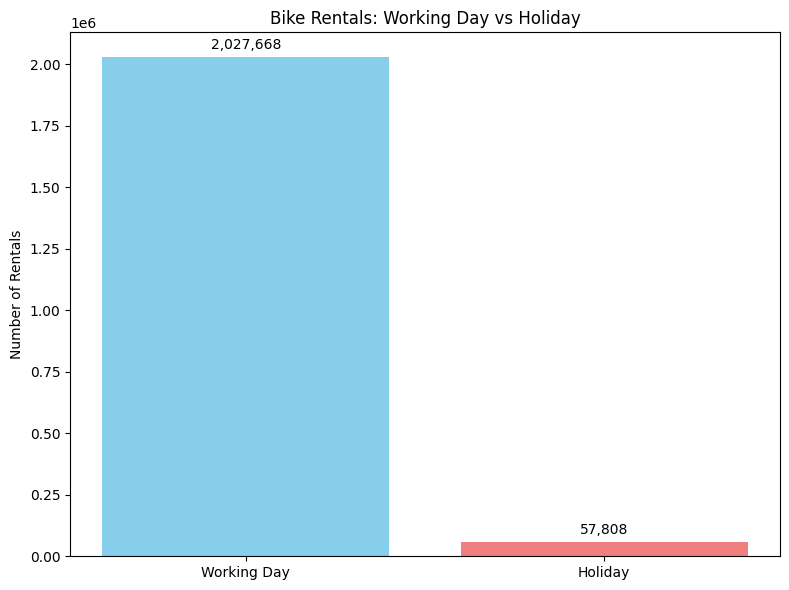

In [11]:
import matplotlib.pyplot as plt

# Data
labels = ['Working Day', 'Holiday']
counts = df_groupby

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'lightcoral'])

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20000, f'{yval:,}', ha='center', va='bottom')

plt.title('Bike Rentals: Working Day vs Holiday')
plt.ylabel('Number of Rentals')
plt.tight_layout()
plt.show()


- The chart clearly shows that bike rentals are much higher on working days compared to holidays. 
- This likely reflects commuter usage, where people rent bikes to get to work or school on regular weekdays.

### Doing Analysis

- We employ the t-test rather than the z-test because, despite having large samples (both samples contain more than 30 observations), we are unaware of the population standard deviation (σ).
- We must determine whether the specified data groups have the same variance before doing the two-sample t-test.

In [12]:
# bike rent on weekdays
data_group1 = df[df['holiday']==0]['count'].values

# bike rent on weekend
data_group2 = df[df['holiday']==1]['count'].values

# varience
np.var(data_group1), np.var(data_group2)

(32943.901106481346, 28233.99150132856)

Based on the values, the variances can be considered approximately equal, so we can proceed with the standard two-sample t-test.



*   To calculate two sample proportion z test, we can use stats.ttest_ind
1. import library
  - from scipy import stats
2. Use function `stats.ttest_ind(a=...., b=...., equal_var=True/False)`
  - `a`: First data group
  - `b`: Second data group
  - `equal_var = True` : The standard independent two sample t-test will be conducted by taking into consideration the equal population variances.
  - `equal_var = False` : The Welch’s t-test will be conducted by not taking into consideration the equal population variances.

3. The function will be able to return 2 output, namely statistic test and p_value.






In [13]:
from scipy import stats
result = stats.ttest_ind(a = data_group1,
                         b = data_group2,
                         equal_var=True, # don't need to use it because the default is true
                         alternative= 'greater')

In [14]:
result.pvalue

0.28684619416355517

In [15]:
result.statistic

0.5626388963477119

In [16]:
# menentukan aturan keputusan
if result.pvalue < 0.05:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the Null hypothesis')

Failed to reject the Null hypothesis


Based on the statistical analysis, there is enough evidence to suggest that working days have a significant effect on the number of electric cycles rented

Degree of freedom from two-samples

In [17]:
df_data = len(data_group1)+len(data_group2)-2
df_data

10884

Text(0.5, 1.0, 't Distribution Plot with df = 10884 \n\n t-statistic = 0.5626, t_crit = 1.645, alpha = 0.05')

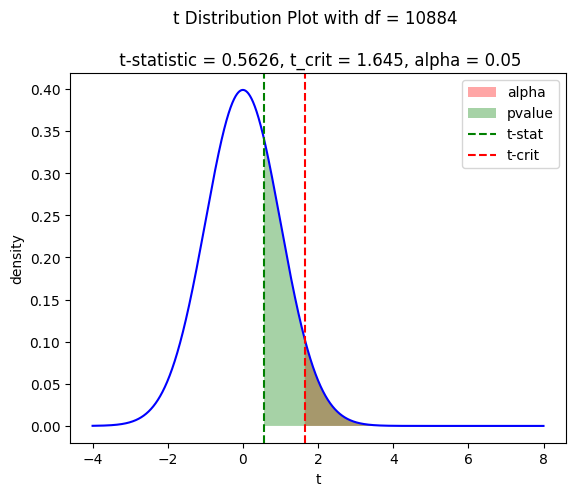

In [21]:
# plot sample distribution
x = np.arange(-4, 8, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color = 'green',
            linestyle = '--',
            label = 't-stat')

t_crit = np.round(stats.t.ppf(1-0.05, df =df_data), 4)
plt.axvline(t_crit,
            color = 'red',
            linestyle = '--',
            label = 't-crit')

plt.legend()
plt.xlabel('t')
plt.ylabel('density')

plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05')

In [19]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=data_group1), 
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -13.22789740496096 24.955580087986096 ]


We are 95% confident that the true difference in the average number of bike rentals between non-holidays and holidays lies between -13.2 and 24.9 bikes.

### Conclusion

The p-value of 0.287 is greater than the significance level of 0.05, therefore we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the average number of bike rentals between non-holidays and holidays.

The 95% confidence interval for the difference in bike rentals between working days and holidays is from -13.2 to 24.9. Since this interval includes 0, it supports the conclusion that the difference is not statistically significant.